In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("breast-cancer.labels", "r") as file:
    columnNames = file.read().splitlines()

train_data = pd.io.parsers.read_csv("./breast-cancer-train.dat", names=columnNames)
validate_data = pd.io.parsers.read_csv("./breast-cancer-validate.dat", names=columnNames)
train_data.head()

,patient ID,Malignant/Benign,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),...,radius (worst),texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


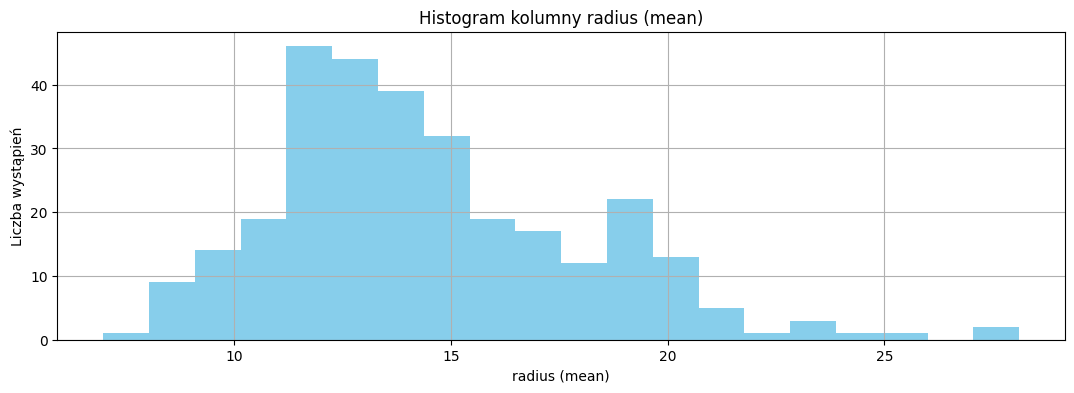

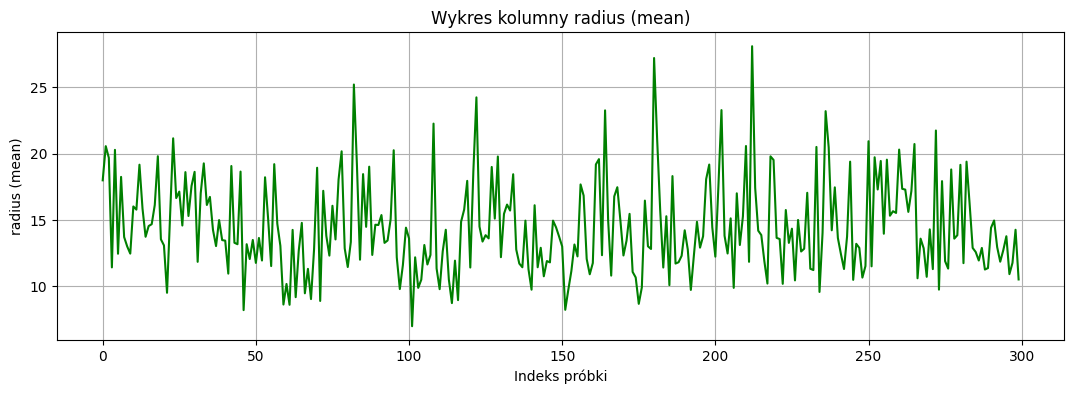

In [3]:
selected_column = 'radius (mean)'

# Tworzenie histogramu
plt.figure(figsize=(13, 4))
plt.hist(train_data[selected_column], bins=20, color='skyblue')
plt.title(f'Histogram kolumny {selected_column}')
plt.xlabel(selected_column)
plt.ylabel('Liczba wystąpień')
plt.grid(True)
plt.show()

plt.figure(figsize=(13, 4))
plt.plot(train_data[selected_column], color='green')
plt.title(f'Wykres kolumny {selected_column}')
plt.xlabel('Indeks próbki')
plt.ylabel(selected_column)
plt.grid(True)
plt.show()

In [4]:
selected_columns = ['radius (mean)', 'perimeter (mean)', 'area (mean)', 'symmetry (mean)']

# Dodaj kolumnę z jedynkami do macierzy danych treningowych i walidacyjnych
X_train_linear = train_data[selected_columns].copy()
X_train_linear = X_train_linear.to_numpy()
print(X_train_linear)

X_train_quad = train_data[selected_columns].copy()
X_train_quad = pd.DataFrame(X_train_quad)
squared_features_linear = X_train_quad ** 2
product_features_linear = np.array([X_train_quad.iloc[:, i] * X_train_quad.iloc[:, j] for i in range(X_train_quad.shape[1])
                                    for j in range(i + 1, X_train_quad.shape[1])]).T
X_train_quad = np.hstack((X_train_quad, squared_features_linear, product_features_linear))
print(X_train_quad[0])

X_validate_linear = validate_data[selected_columns].copy()
X_validate_linear = X_validate_linear.to_numpy()
print(X_validate_linear)

X_validate_quad = validate_data[selected_columns].copy()
X_validate_quad = pd.DataFrame(X_validate_quad)
squared_features_quad = X_validate_quad ** 2
product_features_quad = np.array([X_validate_quad.iloc[:, i] * X_validate_quad.iloc[:, j] for i in range(X_validate_quad.shape[1])
                                  for j in range(i + 1, X_validate_quad.shape[1])]).T
X_validate_quad = np.hstack((X_validate_quad, squared_features_quad, product_features_quad))
print(X_validate_quad[0])

[[1.799e+01 1.228e+02 1.001e+03 2.419e-01]
 [2.057e+01 1.329e+02 1.326e+03 1.812e-01]
 [1.969e+01 1.300e+02 1.203e+03 2.069e-01]
 ...
 [1.176e+01 7.500e+01 4.311e+02 1.619e-01]
 [1.426e+01 9.122e+01 6.331e+02 1.635e-01]
 [1.051e+01 6.685e+01 3.342e+02 1.695e-01]]
[1.799000e+01 1.228000e+02 1.001000e+03 2.419000e-01 3.236401e+02
 1.507984e+04 1.002001e+06 5.851561e-02 2.209172e+03 1.800799e+04
 4.351781e+00 1.229228e+05 2.970532e+01 2.421419e+02]
[[1.953e+01 1.295e+02 1.217e+03 1.792e-01]
 [1.246e+01 8.043e+01 4.713e+02 1.781e-01]
 [2.009e+01 1.347e+02 1.247e+03 2.249e-01]
 ...
 [9.423e+00 5.926e+01 2.713e+02 1.742e-01]
 [1.459e+01 9.639e+01 6.571e+02 1.454e-01]
 [1.151e+01 7.452e+01 4.035e+02 1.388e-01]]
[1.953000e+01 1.295000e+02 1.217000e+03 1.792000e-01 3.814209e+02
 1.677025e+04 1.481089e+06 3.211264e-02 2.529135e+03 2.376801e+04
 3.499776e+00 1.576015e+05 2.320640e+01 2.180864e+02]


In [5]:
b_train = np.where(train_data['Malignant/Benign'] == 'M', 1, -1)
b_validate = np.where(validate_data['Malignant/Benign'] == 'M', 1, -1)

In [6]:
w_train_linear = np.linalg.solve(X_train_linear.T @ X_train_linear, X_train_linear.T @ b_train)
w_train_quad = np.linalg.solve(X_train_quad.T @ X_train_quad, X_train_quad.T @ b_train)
w_validate_linear = np.linalg.solve(X_validate_linear.T @ X_validate_linear, X_validate_linear.T @ b_validate)
w_calidate_quad = np.linalg.solve(X_validate_quad.T @ X_validate_quad, X_validate_quad.T @ b_validate)

In [7]:
cond_linear = np.linalg.cond(X_train_linear.T @ X_train_linear)
cond_quadratic = np.linalg.cond(X_train_quad.T @ X_train_quad)

In [8]:
p_linear = X_validate_linear @ w_train_linear
false_positives_linear = np.sum((p_linear > 0) & (b_validate == -1))
false_negatives_linear = np.sum((p_linear <= 0) & (b_validate == 1))
print(false_positives_linear)
print(false_negatives_linear)

p_quad = X_validate_quad @ w_train_quad
false_positives_quad = np.sum((p_quad > 0) & (b_validate == -1))
false_negatives_quad = np.sum((p_quad <= 0) & (b_validate == 1))
print(false_positives_quad)
print(false_negatives_quad)

8
7
15
5
